In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Data
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')
data_fake['label'] = 0
data_true['label'] = 1
data = pd.concat([data_fake, data_true], axis=0).reset_index(drop=True)

# Preprocessing
data['text'] = data['text'].astype(str)
X = data['text'].values
y = data['label'].values

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=300, padding='post', truncating='post')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Define BiLSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=300),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.9500 - loss: 0.1530 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 724s 1s/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0038
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 735s 1s/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9991 - val_loss: 0.0040
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9996 - val_loss: 0.0032
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 165ms/step
Accuracy: 0.999554565701559
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg    

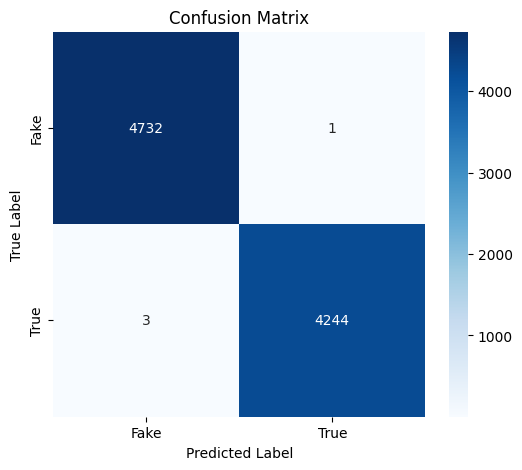

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
